Saha Equation is given by:

$$\frac{n_{r+1}n_e}{n_r}=\frac{G_{r+1}g_e}{G_r}\frac{(2πm_ekT)^{3/2}}{h^3}exp(-\frac{χ_r}{kT})$$

For most astrophysical applications involving hydorgen, the ground-state statistical weight is a
satisfactory approximation for $G_r$.

$$G_r(T)=g_{r,0}=2$$

Because the proton has no bound electrons in the ionized state,

$$G_{r+1}(T)=g_{r+1,0}=1.$$

The free electron, $g_e=2$; it has spin up
and spin down.

In the (pure) hydrogen plasma, $n_{r+1}=n_e.$
The total density $n$ is $n=n_{r+1}+n_r.$

Hence, the equation becomes

$$\frac{n_{r+1}^2}{n_r}=\frac{(2πm_ekT)^{3/2}}{h^3}exp(-\frac{χ_r}{kT})$$

or

$$\frac{n_{r+1}}{n_r}=(\frac{-1+\sqrt{1+\frac{4n}{x}}}{2})^{-1}$$

where
$x=\frac{n_{r+1}^2}{n_r}=\frac{(2πm_ekT)^{3/2}}{h^3}exp(-\frac{χ_r}{kT})$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sp

In [ ]:
# Variables
pi = sp.pi
m_e = sp.m_e                      # electron mass
k = sp.k                          # Boltzmann constant
T = np.linspace(1, 1000000, 1000) # temperature
h = sp.h                          # Planck constant
chi = 13.6 * sp.eV                # ionization potential

# Define x
f = (2*pi*m_e*k*T)**1.5 / (h**3) * np.exp(-chi/(k*T))

In [ ]:
# Saha Equation (ionization degree for hydrogen plasma)

def saha(n):
  return 2 / (-1 + np.sqrt(1+(4*n/f)))

<ipython-input-33-bf7dde1effc4>:4: RuntimeWarning: divide by zero encountered in divide
  return 2 / (-1 + np.sqrt(1+(4*n/f)))
<ipython-input-37-b3acd8743f23>:6: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(saha(n))


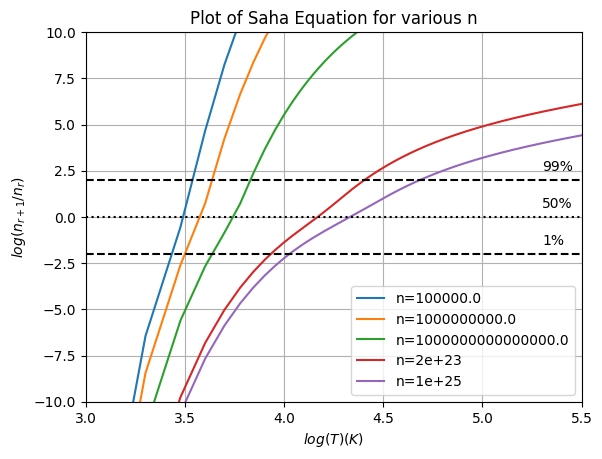

In [ ]:
# Plot of log ionization fraction for various fixed total densities as a function of temperature

n_list = [1e5, 1e9, 1e15, 2e23, 1e25]
for n in n_list:
  x = np.log10(T)
  y = np.log10(saha(n))
  plt.plot(x, y, label=f'n={n}')

plt.xlim(3, 5.5)
plt.ylim(-10, 10)
plt.axhline(y=-2, color='black', linestyle = 'dashed')
plt.axhline(y=0, color='black', linestyle = 'dotted')
plt.axhline(y=2, color='black', linestyle = 'dashed')
plt.xlabel(r'$log(T) (K)$')
plt.ylabel(r'$log(n_{r+1}/n_r)$')
plt.text(5.3, -1.5, '1%')
plt.text(5.3, 0.5, '50%')
plt.text(5.3, 2.5, '99%')
plt.title('Plot of Saha Equation for various n')
plt.legend()
plt.grid()
plt.show()